In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
# convert data to dataframe and print first columns
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
# number of rows and columns of data
df.shape

(110527, 14)

array([[<AxesSubplot:title={'center':'PatientId'}>,
        <AxesSubplot:title={'center':'AppointmentID'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Scholarship'}>,
        <AxesSubplot:title={'center':'Hipertension'}>,
        <AxesSubplot:title={'center':'Diabetes'}>],
       [<AxesSubplot:title={'center':'Alcoholism'}>,
        <AxesSubplot:title={'center':'Handcap'}>,
        <AxesSubplot:title={'center':'SMS_received'}>]], dtype=object)

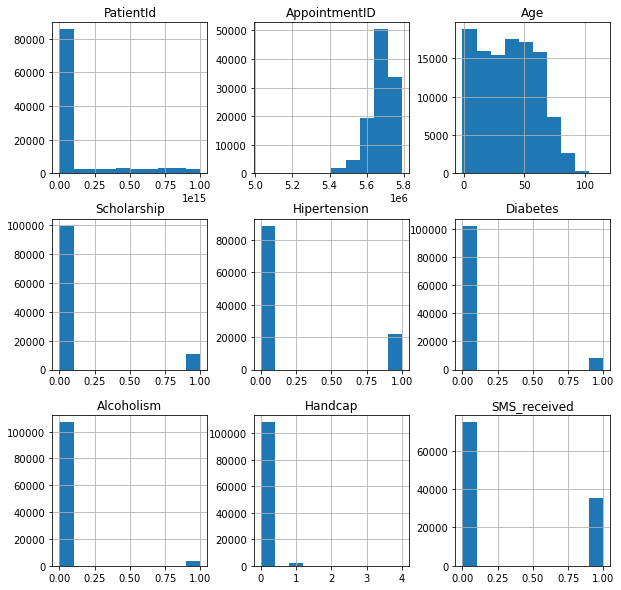

In [5]:
# draw histograph for data
df.hist(figsize = (10, 10))

In [6]:
# drop 3 unnecessary columns
df = df.drop(['ScheduledDay', 'AppointmentDay', 'AppointmentID'], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   PatientId      110527 non-null  float64
 1   Gender         110527 non-null  object 
 2   Age            110527 non-null  int64  
 3   Neighbourhood  110527 non-null  object 
 4   Scholarship    110527 non-null  int64  
 5   Hipertension   110527 non-null  int64  
 6   Diabetes       110527 non-null  int64  
 7   Alcoholism     110527 non-null  int64  
 8   Handcap        110527 non-null  int64  
 9   SMS_received   110527 non-null  int64  
 10  No-show        110527 non-null  object 
dtypes: float64(1), int64(7), object(3)
memory usage: 9.3+ MB


In [7]:
# calculate nulls in every column
df.isna().sum()

PatientId        0
Gender           0
Age              0
Neighbourhood    0
Scholarship      0
Hipertension     0
Diabetes         0
Alcoholism       0
Handcap          0
SMS_received     0
No-show          0
dtype: int64

In [8]:
# drop duplicates
df.drop_duplicates(inplace = True)
df

,PatientId,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...
110518,7.263315e+13,F,50,MARIA ORTIZ,0,0,0,0,0,1,No
110520,9.969977e+14,F,42,MARIA ORTIZ,0,0,0,0,0,1,No
110521,3.635534e+13,F,53,MARIA ORTIZ,0,0,0,0,0,1,No
110522,2.572134e+12,F,56,MARIA ORTIZ,0,0,0,0,0,1,No


In [9]:
# inforamtion of new to new data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82563 entries, 0 to 110524
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PatientId      82563 non-null  float64
 1   Gender         82563 non-null  object 
 2   Age            82563 non-null  int64  
 3   Neighbourhood  82563 non-null  object 
 4   Scholarship    82563 non-null  int64  
 5   Hipertension   82563 non-null  int64  
 6   Diabetes       82563 non-null  int64  
 7   Alcoholism     82563 non-null  int64  
 8   Handcap        82563 non-null  int64  
 9   SMS_received   82563 non-null  int64  
 10  No-show        82563 non-null  object 
dtypes: float64(1), int64(7), object(3)
memory usage: 7.6+ MB


array([[<AxesSubplot:title={'center':'PatientId'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Scholarship'}>],
       [<AxesSubplot:title={'center':'Hipertension'}>,
        <AxesSubplot:title={'center':'Diabetes'}>,
        <AxesSubplot:title={'center':'Alcoholism'}>],
       [<AxesSubplot:title={'center':'Handcap'}>,
        <AxesSubplot:title={'center':'SMS_received'}>, <AxesSubplot:>]],
      dtype=object)

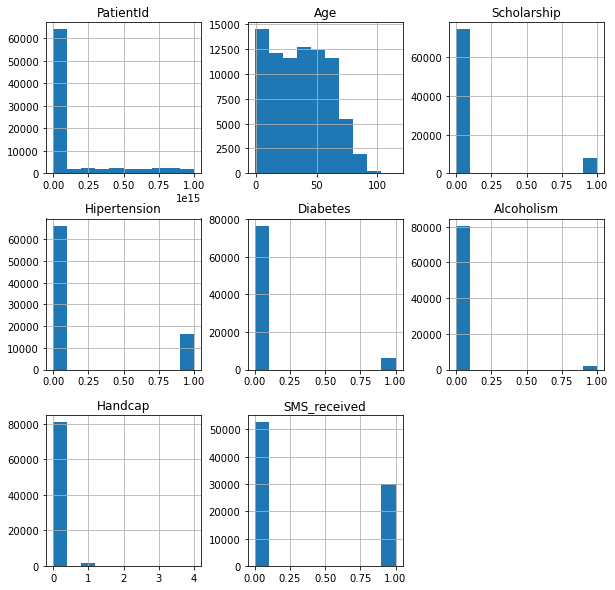

In [10]:
# histograph for new to new data
df.hist(figsize = (10, 10))

In [11]:
# number of rows and columns of new data
df.shape

(82563, 11)

[[ 1.         -0.09316057]
 [-0.09316057  1.        ]]


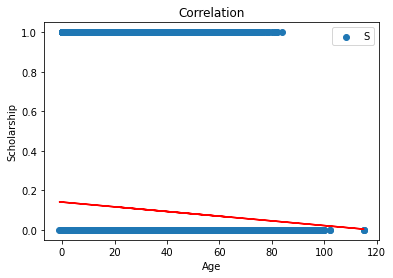

In [12]:
# calculate correlation between age and scholarship and draw them
print(np.corrcoef(df['Age'], df['Scholarship']))
plt.scatter(df['Age'], df['Scholarship'])
plt.xlabel('Age')
plt.ylabel('Scholarship')
plt.legend('Scholarship')
plt.title('Correlation')
# draw fit line
m, b = np.polyfit(df['Age'], df['Scholarship'], 1)
plt.plot(df['Age'], m * df['Age'] + b, 'r')
plt.show()

[[ 1.         -0.00257004]
 [-0.00257004  1.        ]]


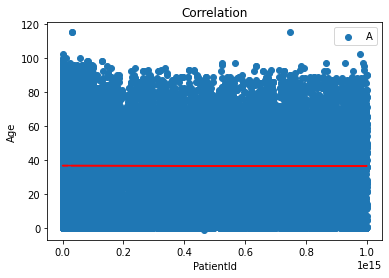

In [13]:
# calculate correlation between PatientId and age and draw them
print(np.corrcoef(df['PatientId'], df['Age']))
plt.scatter(df['PatientId'], df['Age'])
plt.xlabel('PatientId')
plt.ylabel('Age')
plt.legend('Age')
plt.title('Correlation')
# draw fit line
m, b = np.polyfit(df['PatientId'], df['Age'], 1)
plt.plot(df['PatientId'], m * df['PatientId'] + b, 'r')
plt.show()

In [14]:
# which is lastest scholarships
last = df.sort_values(by = ['Scholarship'], ascending = False)
last.head()

,PatientId,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
80841,4.155836e+11,F,46,INHANGUETÁ,1,1,0,0,0,1,No
34670,3.644273e+13,F,29,MONTE BELO,1,0,0,0,0,1,Yes
22613,6.918991e+12,F,20,SÃO BENEDITO,1,0,0,0,0,1,No
84564,7.873570e+12,F,69,SOLON BORGES,1,0,0,0,0,0,No
98141,5.326317e+12,F,12,SÃO CRISTÓVÃO,1,0,0,0,0,0,No


In [15]:
# who has scholarship and alcholism to reject him from scholarship
reject = df[['Alcoholism', 'Scholarship']]
reject = reject.sort_values(by=['Scholarship' , 'Alcoholism'] , ascending = False )
reject

,Alcoholism,Scholarship
331,1,1
459,1,1
587,1,1
859,1,1
1032,1,1
...,...,...
110518,0,0
110520,0,0
110521,0,0
110522,0,0


In [16]:
# assign values to x and y to ready for training and testing
x = [df['Age'], df['PatientId']]
y = [df['Scholarship'], df['Alcoholism']]

In [17]:
# train and test for data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [18]:
# print train of x
print(x_train)

[0         62
1         56
2         62
3          8
4         56
          ..
110518    50
110520    42
110521    53
110522    56
110524    21
Name: Age, Length: 82563, dtype: int64]


In [19]:
# print test of x
print(x_test)

[0         2.987250e+13
1         5.589978e+14
2         4.262962e+12
3         8.679512e+11
4         8.841186e+12
              ...     
110518    7.263315e+13
110520    9.969977e+14
110521    3.635534e+13
110522    2.572134e+12
110524    1.557663e+13
Name: PatientId, Length: 82563, dtype: float64]


In [20]:
# print train of y
print(y_train)

[0         0
1         0
2         0
3         0
4         0
         ..
110518    0
110520    0
110521    0
110522    0
110524    0
Name: Scholarship, Length: 82563, dtype: int64]


In [21]:
# print test of y
print(y_test)

[0         0
1         0
2         0
3         0
4         0
         ..
110518    0
110520    0
110521    0
110522    0
110524    0
Name: Alcoholism, Length: 82563, dtype: int64]


In [22]:
# perform knn
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(x_train, y_train)
# Predict on dataset which model has not seen before
print(knn.predict(x_test))

[[0 0 0 ... 0 0 0]]


[Text(0.5, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [[1.0]\n[1.0]\n[1.0]\n...\n[1.0]\n[1.0]\n[1.0]]')]

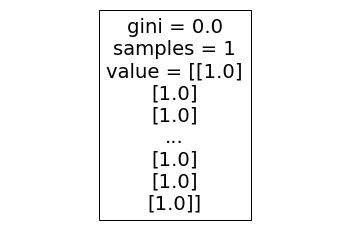

In [23]:
# perform decision tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)
# draw decision tree
tree.plot_tree(clf)

In [24]:
# make another training and testing data for naive bayes and k means
x2 = df[['PatientId','Gender','Age','Alcoholism']]
y2 = df['Scholarship']

In [25]:
# Convert Text (Gender) to (0 & 1) so all entire data set is numeric
x2['Gender'].replace(['F','M'],[0,1],inplace=True)

C:\Users\ybahg\AppData\Local\Temp\ipykernel_9120\2759256942.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x2['Gender'].replace(['F','M'],[0,1],inplace=True)


In [26]:
# Splitting data set into training and testing test
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.2)
x2.head()

,PatientId,Gender,Age,Alcoholism
0,2.987250e+13,0,62,0
1,5.589978e+14,1,56,0
2,4.262962e+12,0,62,0
3,8.679512e+11,0,8,0
4,8.841186e+12,0,56,0


In [27]:
# perform naive bayes
classifier = GaussianNB()
classifier.fit(x2_train, y2_train)
classifier.score(x2_train, y2_train)

0.903663890991673

In [28]:
# Show the first 10 records of x2
x2_test[:10]

,PatientId,Gender,Age,Alcoholism
23860,9.555526e+13,0,29,0
79419,9.538795e+10,1,85,0
99291,4.729479e+13,0,66,0
37865,4.773164e+14,1,25,0
41199,4.624544e+13,0,54,0
1887,8.178741e+14,0,21,0
85917,4.576140e+13,0,0,0
105831,8.164917e+12,0,23,0
105978,9.388790e+12,1,29,0
79236,6.393313e+13,1,59,0


In [29]:
# Show the first 10 records of y2
y2_test[:10]

23860     1
79419     0
99291     0
37865     0
41199     0
1887      0
85917     0
105831    0
105978    0
79236     0
Name: Scholarship, dtype: int64

In [30]:
# Show how the predict went
classifier.predict(x2_test[:10])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [31]:
# perform k means, specify number of clusters = 3 and make fit model
means = KMeans(3)
means.fit(x2_train, y2_train)

KMeans(n_clusters=3)

In [32]:
# make predictions
identified_clusters = means.predict(x2_test)
identified_clusters

array([1, 1, 1, ..., 1, 1, 1])

In [33]:
# print classification report
print(classification_report(y2_test, identified_clusters))

              precision    recall  f1-score   support

           0       0.90      0.10      0.17     14860
           1       0.10      0.81      0.18      1653
           2       0.00      0.00      0.00         0

    accuracy                           0.17     16513
   macro avg       0.33      0.30      0.12     16513
weighted avg       0.82      0.17      0.17     16513



C:\Users\ybahg\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ybahg\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ybahg\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Choosing An Optimal K Value Using the Elbow Method and draw it
error_rates = []
for i in np.arange(1, 101):
    new_model = KNeighborsClassifier(n_neighbors = i)
    new_model.fit(x2_train, y2_train)
    new_predictions = new_model.predict(x2_test)
    error_rates.append(np.mean(new_predictions != y2_test))
plt.figure(figsize=(16, 12))
plt.plot(error_rates)